# Librerías

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os
import seaborn as sns

%matplotlib inline

Listado del total de los datos.

In [2]:
os.listdir('../data/')

['product_blocks.csv',
 'prepro_train.csv',
 'stock_day_71_stock_replenishment_days_72-77.csv',
 'positions_day_0_day_63.csv',
 'prepro_test.csv',
 'stock_and_sales_day_0_day_63.csv',
 'positions_day_71.csv',
 'products.csv']

#### Product_blocks

In [3]:
product_blocks = pd.read_csv('../data/product_blocks.csv')

In [4]:
product_blocks.head()

,product_id,block_id
0,612967398,0
1,296892108,0
2,139541214,0
3,963923934,0
4,938230141,0


In [5]:
product_blocks.block_id.value_counts().head()

2506    10
1717    10
2666    10
962     10
407     10
Name: block_id, dtype: int64

#### Products

In [6]:
products = pd.read_csv('../data/products.csv')
products.head()

,product_id,family_id,subfamily_id,price
0,151926,396066037,335531561,25.95
1,213413,552529755,11509337,19.95
2,310130,679611953,533441312,12.95
3,373883,775013441,62518413,17.95
4,455200,998145072,490222156,29.95


#### Stock_day_71_stock_replenishment_days_72-77

In [7]:
day_71_77 = pd.read_csv('../data/stock_day_71_stock_replenishment_days_72-77.csv')
day_71_77.head()

,product_id,color_id,size_id,stock_at_day_71,stock_replenishment_days_72,stock_replenishment_days_73,stock_replenishment_days_74,stock_replenishment_days_75,stock_replenishment_days_76,stock_replenishment_days_77
0,151926,909958217,54666687,73,0,0,2,0,0,1
1,151926,909958217,111455099,16,0,0,0,0,0,0
2,151926,909958217,242364222,111,0,1,-1,1,0,0
3,151926,909958217,513017386,47,0,0,0,1,1,1
4,151926,909958217,820445075,71,0,1,-2,2,0,0


In [8]:
len(day_71_77.product_id.value_counts())

8892

#### Positions_day_71-77

In [9]:
position_71 = pd.read_csv('../data/positions_day_71.csv')
position_71.head()

,date_number,product_id,category_id,position
0,71,65968023,2312968,6
1,71,70320877,2312968,24
2,71,70700940,2312968,22
3,71,76636979,2312968,1
4,71,83181798,2312968,0


In [10]:
position_71.date_number.value_counts()

71    20029
Name: date_number, dtype: int64

In [11]:
len(position_71.product_id.value_counts())

7728

#### Positions_day_0_day_63

In [12]:
position_0_63 = pd.read_csv('../data/positions_day_0_day_63.csv')
position_0_63.head()

,date_number,product_id,category_id,position
0,0,4450020,4461548,17
1,0,42147334,4461548,4
2,0,81131830,4461548,35
3,0,84035833,4461548,38
4,0,125252584,4461548,39


In [13]:
position_0_63.date_number.value_counts().head()

63    18688
61    18472
60    18429
62    18249
59    18244
Name: date_number, dtype: int64

#### Stock_and_sales_day_0_day_63

In [14]:
sales_0_63 = pd.read_csv('../data/stock_and_sales_day_0_day_63.csv')
sales_0_63.head()

,date_number,product_id,color_id,size_id,sales,stock
0,0,310130,78467031,7026791,1,93
1,0,310130,78467031,8015276,2,62
2,0,310130,78467031,452052101,1,18
3,0,310130,78467031,541898038,2,42
4,0,310130,78467031,558685710,3,113


# Generación de los conjuntos TRAIN / TEST

El primer objetivo de la competición es formar un conjunto de entrenamiento de modelos y otro de test.

Para comenzar, iremos mergeando los diferentes datasets hasta dar con un primer conjunto de datos inicial. Uniremos los datasets de ventas-stock y posicionamiento en la web para los días de 0 a 63

## TRAIN

In [15]:
df_0_63 = position_0_63.join(sales_0_63.set_index(['date_number', 'product_id']),
                             on=['date_number', 'product_id'],
                             how='right')
df_0_63.head()

,date_number,product_id,category_id,position,color_id,size_id,sales,stock
0,0,4450020,4461548.0,17.0,10926303,242364222,1,1
42,0,4450020,6649227.0,76.0,10926303,242364222,1,1
6058,0,4450020,563537811.0,48.0,10926303,242364222,1,1
7692,0,4450020,702067879.0,76.0,10926303,242364222,1,1
8482,0,4450020,751330438.0,2.0,10926303,242364222,1,1


In [16]:
print(sales_0_63.shape, position_0_63.shape, df_0_63.shape)

(2421061, 6) (969897, 4) (5607224, 8)


Nulls

In [17]:
df_0_63.isnull().sum().sum()

373884

In [18]:
nan_rows = df_0_63[df_0_63.isnull().T.any().T]
nan_rows[nan_rows.sales>0].head()

,date_number,product_id,category_id,position,color_id,size_id,sales,stock
969896,0,6339011,NaN,NaN,165718507,3000471,1,22
969896,0,6339011,NaN,NaN,165718507,558685710,1,25
969896,0,17705785,NaN,NaN,271590995,820445075,2,104
969896,0,18904572,NaN,NaN,431398116,820445075,1,1
969896,0,21302554,NaN,NaN,523743496,111455099,1,74


In [19]:
df_0_63_products = df_0_63.join(products.set_index(['product_id']), on=['product_id'], how='left')
df_0_63_products.head()

,date_number,product_id,category_id,position,color_id,size_id,sales,stock,family_id,subfamily_id,price
0,0,4450020,4461548.0,17.0,10926303,242364222,1,1,511255811,731664934,12.95
42,0,4450020,6649227.0,76.0,10926303,242364222,1,1,511255811,731664934,12.95
6058,0,4450020,563537811.0,48.0,10926303,242364222,1,1,511255811,731664934,12.95
7692,0,4450020,702067879.0,76.0,10926303,242364222,1,1,511255811,731664934,12.95
8482,0,4450020,751330438.0,2.0,10926303,242364222,1,1,511255811,731664934,12.95


In [20]:
nan_rows = df_0_63_products[df_0_63_products.isnull().T.any().T]
nan_rows[nan_rows.sales>0].head()

,date_number,product_id,category_id,position,color_id,size_id,sales,stock,family_id,subfamily_id,price
969896,0,6339011,NaN,NaN,165718507,3000471,1,22,998145072,309388913,59.95
969896,0,6339011,NaN,NaN,165718507,558685710,1,25,998145072,309388913,59.95
969896,0,17705785,NaN,NaN,271590995,820445075,2,104,775013441,478492088,25.95
969896,0,18904572,NaN,NaN,431398116,820445075,1,1,775013441,478492088,15.99
969896,0,21302554,NaN,NaN,523743496,111455099,1,74,744793598,330273563,29.95


In [21]:
print(df_0_63_products.shape, df_0_63.shape, products.shape)

(5607224, 11) (5607224, 8) (15238, 4)


In [22]:
df_0_63_products_blocks = df_0_63_products.join(product_blocks.set_index(['product_id']), on=['product_id'], how='left')
df_0_63_products_blocks.head(5)

,date_number,product_id,category_id,position,color_id,size_id,sales,stock,family_id,subfamily_id,price,block_id
0,0,4450020,4461548.0,17.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
42,0,4450020,6649227.0,76.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
6058,0,4450020,563537811.0,48.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
7692,0,4450020,702067879.0,76.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
8482,0,4450020,751330438.0,2.0,10926303,242364222,1,1,511255811,731664934,12.95,1779


#### Generación del train final

In [23]:
df_0_63_products_blocks.head(20)

,date_number,product_id,category_id,position,color_id,size_id,sales,stock,family_id,subfamily_id,price,block_id
0,0,4450020,4461548.0,17.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
42,0,4450020,6649227.0,76.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
6058,0,4450020,563537811.0,48.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
7692,0,4450020,702067879.0,76.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
8482,0,4450020,751330438.0,2.0,10926303,242364222,1,1,511255811,731664934,12.95,1779
0,0,4450020,4461548.0,17.0,10926303,513017386,4,11,511255811,731664934,12.95,1779
42,0,4450020,6649227.0,76.0,10926303,513017386,4,11,511255811,731664934,12.95,1779
6058,0,4450020,563537811.0,48.0,10926303,513017386,4,11,511255811,731664934,12.95,1779
7692,0,4450020,702067879.0,76.0,10926303,513017386,4,11,511255811,731664934,12.95,1779
8482,0,4450020,751330438.0,2.0,10926303,513017386,4,11,511255811,731664934,12.95,1779


In [24]:
df_0_63_products_blocks.groupby(['date_number', 'product_id']).std().head()

category_id   position  color_id       size_id  \
date_number product_id                                                    
0           310130      7.615378e+06  37.194534       0.0  2.935263e+08   
            1178388     0.000000e+00   0.000000       0.0  3.139796e+08   
            1561460     2.253312e+08  14.808299       0.0  2.940813e+08   
            1874414     2.005744e+08  59.873199       0.0  2.305350e+08   
            2436420              NaN        NaN       0.0  3.176441e+08   

                           sales      stock  family_id  subfamily_id  price  \
date_number product_id                                                        
0           310130      0.746420  34.811328        0.0           0.0    0.0   
            1178388     0.000000   2.160247        0.0           0.0    0.0   
            1561460     1.242118  55.438769        0.0           0.0    0.0   
            1874414     0.478091  20.463906        0.0           0.0    0.0   
            2436420     0.000000  23.377339        0.0           0.0    0.0   

                        block_id  
date_number product_id            
0           310130           0.0  
            1178388          0.0  
            1561460          0.0  
            1874414          0.0  
            2436420          0.0

Variable respuesta

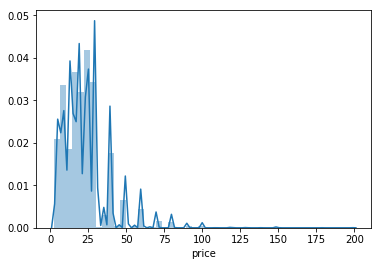

In [58]:
ax = sns.distplot(df_0_63_products_blocks.price)

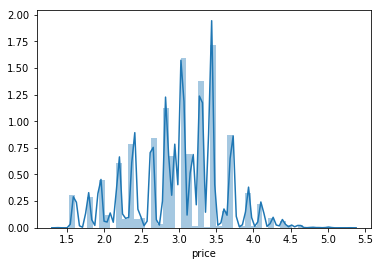

In [59]:
ax = sns.distplot(np.log1p(df_0_63_products_blocks.price))

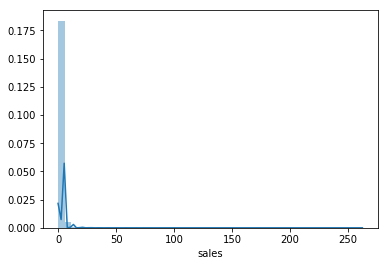

In [61]:
ax = sns.distplot(df_0_63_products_blocks.sales)

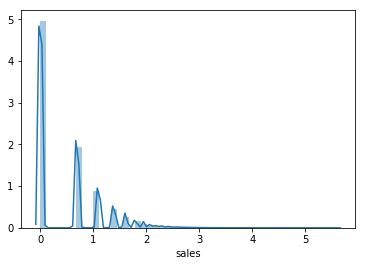

In [62]:
ax = sns.distplot(np.log1p(df_0_63_products_blocks.sales))

In [63]:
len(np.log1p(df_0_63_products_blocks.price).unique())
len(np.log1p(df_0_63_products_blocks.sales).unique())

121

In [26]:
def DF_generator(df_in, tr=True):
    n_unique = df_in.groupby(['date_number', 'product_id']).nunique()
    max_df = df_in.groupby(['date_number', 'product_id']).max()
    sum_df = df_in.groupby(['date_number', 'product_id']).sum()
    std_df =  df_in.groupby(['date_number', 'product_id']).std()
        
    sum_sales = sum_df['sales']
    sum_stock = sum_df['stock']
    count_category = n_unique['category_id']
    max_position = max_df['position']
    min_position = df_in.groupby(['date_number', 'product_id']).min()['position']
    count_color = n_unique['color_id']
    count_size = n_unique['size_id']
    count_family = max_df['family_id']
    count_subfamily = max_df['subfamily_id']
    price = max_df['price']
    block = max_df['block_id']
    
    std_stock = std_df['stock']
    std_position = std_df['position']
    
    df_out = pd.concat([block,sum_stock,std_stock,count_family,count_subfamily,count_size,count_color,
                   max_position,min_position,std_position,count_category,price,sum_sales], axis=1)
    df_out.columns = ['block_id', 'stock', 'std_stock', 'family_id', 'subfamily_id', 'size_id',
           'color_id', 'position_max', 'position_min', 'std_position', 'category_id', 'price', 'sales']
    
    return df_out

In [27]:
# n_unique = df_0_63_products_blocks.groupby(['date_number', 'product_id']).nunique()
# max_df = df_0_63_products_blocks.groupby(['date_number', 'product_id']).max()
# sum_df = df_0_63_products_blocks.groupby(['date_number', 'product_id']).sum()

# sum_sales = sum_df['sales']
# sum_stock = sum_df['stock']
# count_category = n_unique['category_id']
# max_position = max_df['position']
# min_position = df_0_63_products_blocks.groupby(['date_number', 'product_id']).min()['position']
# count_color = n_unique['color_id']
# count_size = n_unique['size_id']
# count_family = max_df['family_id']
# count_subfamily = max_df['subfamily_id']
# price = max_df['price']
# block = max_df['block_id']

# train = pd.concat([sum_stock,block,count_family,count_subfamily,count_size,count_color,
#                    max_position,min_position,count_category,price,sum_sales], axis=1)
# train.columns = ['stock', 'block_id', 'family_id', 'subfamily_id', 'size_id',
#        'color_id', 'position_max', 'position_min', 'category_id', 'price', 'sales']
# train.head(10)

In [28]:
train = DF_generator(df_0_63_products_blocks)
train.head(10)

block_id  stock  std_stock  family_id  subfamily_id  \
date_number product_id                                                        
0           310130          1726   1383  34.811328  679611953     533441312   
            1178388          592     60   2.160247  732697347     691762817   
            1561460         1625   2373  55.438769  396066037     520569701   
            1874414         1135   1686  20.463906  744793598     811402796   
            2436420          779    245  23.377339  768025921     665805124   
            2637932          768     57   1.870829  429269907     778576411   
            2644529         1339   1332  10.341979  831347344     373740397   
            3093333          123     13   0.707107  511255811     194174548   
            3129413         1027   2168  62.629574  953774311     486307114   
            3176725          546   1086  33.337121  396066037     335531561   

                        size_id  color_id  position_max  position_min  \
date_number product_id                                                  
0           310130            7         1          80.0           3.0   
            1178388           4         1          19.0          19.0   
            1561460           5         1          38.0           3.0   
            1874414           6         1         190.0          12.0   
            2436420           5         1           NaN           NaN   
            2637932           6         1           NaN           NaN   
            2644529           8         1          26.0           4.0   
            3093333           2         1          70.0          70.0   
            3129413           6         2         181.0          14.0   
            3176725           4         1         131.0           9.0   

                        std_position  category_id  price  sales  
date_number product_id                                           
0           310130         37.194534            3  12.95     33  
            1178388         0.000000            1  49.95      0  
            1561460        14.808299            3  29.95     21  
            1874414        59.873199            6  25.95     24  
            2436420              NaN            0  25.95      0  
            2637932              NaN            0  79.95      0  
            2644529        10.593955            3   7.95     18  
            3093333         0.000000            1  35.95      4  
            3129413        67.536657            4  39.99    148  
            3176725        53.572947            3  29.95     27

#### Nulls

In [29]:
train.isnull().sum().sum()

151279

In [30]:
nan_rows = train[train.isnull().T.any().T]
nan_rows[nan_rows.sales>0].head()

block_id  stock  std_stock  family_id  subfamily_id  \
date_number product_id                                                        
0           6339011         2272    158   4.894117  998145072     309388913   
            17705785        2198    104        NaN  775013441     478492088   
            18904572         430      1        NaN  775013441     478492088   
            21302554        2028    596  77.651848  744793598     330273563   
            23383691         216      1        NaN  877011792     723618309   

                        size_id  color_id  position_max  position_min  \
date_number product_id                                                  
0           6339011           7         1           NaN           NaN   
            17705785          1         1           NaN           NaN   
            18904572          1         1           NaN           NaN   
            21302554          5         2           NaN           NaN   
            23383691          1         1           NaN           NaN   

                        std_position  category_id  price  sales  
date_number product_id                                           
0           6339011              NaN            0  59.95      2  
            17705785             NaN            0  25.95      2  
            18904572             NaN            0  15.99      1  
            21302554             NaN            0  29.95      3  
            23383691             NaN            0  12.95      1

Con esto que hemos hecho tendríamos el conjunto de entrenamiento. Ahora tenemos q sacar los "diferentes" conjuntos de validación.



## TEST

Para comenzar separaremos el conjunto de "stock" para los diferentes dias (71, 72, 73, 74, 75, 76 y 77)

In [31]:
day_71_77.head()

,product_id,color_id,size_id,stock_at_day_71,stock_replenishment_days_72,stock_replenishment_days_73,stock_replenishment_days_74,stock_replenishment_days_75,stock_replenishment_days_76,stock_replenishment_days_77
0,151926,909958217,54666687,73,0,0,2,0,0,1
1,151926,909958217,111455099,16,0,0,0,0,0,0
2,151926,909958217,242364222,111,0,1,-1,1,0,0
3,151926,909958217,513017386,47,0,0,0,1,1,1
4,151926,909958217,820445075,71,0,1,-2,2,0,0


In [32]:
day_71_77.columns

Index(['product_id', 'color_id', 'size_id', 'stock_at_day_71',
       'stock_replenishment_days_72', 'stock_replenishment_days_73',
       'stock_replenishment_days_74', 'stock_replenishment_days_75',
       'stock_replenishment_days_76', 'stock_replenishment_days_77'],
      dtype='object')

In [33]:
stock_71 = day_71_77[['product_id', 'color_id', 'size_id']]
stock_71['stock'] = day_71_77['stock_at_day_71']
stock_71['date_number'] = 71
stock_71.head()

,product_id,color_id,size_id,stock,date_number
0,151926,909958217,54666687,73,71
1,151926,909958217,111455099,16,71
2,151926,909958217,242364222,111,71
3,151926,909958217,513017386,47,71
4,151926,909958217,820445075,71,71


In [34]:
stock_72 = day_71_77[['product_id', 'color_id', 'size_id']]
stock_72['stock'] = stock_71['stock'] + day_71_77['stock_replenishment_days_72']
stock_72['date_number'] = 72
stock_72.head()

,product_id,color_id,size_id,stock,date_number
0,151926,909958217,54666687,73,72
1,151926,909958217,111455099,16,72
2,151926,909958217,242364222,111,72
3,151926,909958217,513017386,47,72
4,151926,909958217,820445075,71,72


In [35]:
stock_73 = day_71_77[['product_id', 'color_id', 'size_id']]
stock_73['stock'] = stock_72['stock'] + day_71_77['stock_replenishment_days_73']
stock_73['date_number'] = 73
stock_73.head()

,product_id,color_id,size_id,stock,date_number
0,151926,909958217,54666687,73,73
1,151926,909958217,111455099,16,73
2,151926,909958217,242364222,112,73
3,151926,909958217,513017386,47,73
4,151926,909958217,820445075,72,73


In [36]:
stock_74 = day_71_77[['product_id', 'color_id', 'size_id']]
stock_74['stock'] = stock_73['stock'] + day_71_77['stock_replenishment_days_74']
stock_74['date_number'] = 74
stock_74.head()

,product_id,color_id,size_id,stock,date_number
0,151926,909958217,54666687,75,74
1,151926,909958217,111455099,16,74
2,151926,909958217,242364222,111,74
3,151926,909958217,513017386,47,74
4,151926,909958217,820445075,70,74


In [37]:
stock_75 = day_71_77[['product_id', 'color_id', 'size_id']]
stock_75['stock'] = stock_74['stock'] + day_71_77['stock_replenishment_days_75']
stock_75['date_number'] = 75
stock_75.head()

,product_id,color_id,size_id,stock,date_number
0,151926,909958217,54666687,75,75
1,151926,909958217,111455099,16,75
2,151926,909958217,242364222,112,75
3,151926,909958217,513017386,48,75
4,151926,909958217,820445075,72,75


In [38]:
stock_76 = day_71_77[['product_id', 'color_id', 'size_id']]
stock_76['stock'] = stock_75['stock'] + day_71_77['stock_replenishment_days_76']
stock_76['date_number'] = 76
stock_76.head()

,product_id,color_id,size_id,stock,date_number
0,151926,909958217,54666687,75,76
1,151926,909958217,111455099,16,76
2,151926,909958217,242364222,112,76
3,151926,909958217,513017386,49,76
4,151926,909958217,820445075,72,76


In [39]:
stock_77 = day_71_77[['product_id', 'color_id', 'size_id']]
stock_77['stock'] = stock_76['stock'] + day_71_77['stock_replenishment_days_77']
stock_77['date_number'] = 77
stock_77.head()

,product_id,color_id,size_id,stock,date_number
0,151926,909958217,54666687,76,77
1,151926,909958217,111455099,16,77
2,151926,909958217,242364222,112,77
3,151926,909958217,513017386,50,77
4,151926,909958217,820445075,72,77


Ahora podemos unir el dataset al completo

In [40]:
stock_71_77 = pd.concat([stock_71, stock_72 ,stock_73 ,stock_74 ,stock_75 ,stock_76 ,stock_77]).reset_index(drop=True)

In [41]:
stock_71_77.columns

Index(['product_id', 'color_id', 'size_id', 'stock', 'date_number'], dtype='object')

In [42]:
stock_71_77 = stock_71_77[['date_number', 'product_id', 'color_id', 'size_id', 'stock']]

In [43]:
stock_71_77.head()

,date_number,product_id,color_id,size_id,stock
0,71,151926,909958217,54666687,73
1,71,151926,909958217,111455099,16
2,71,151926,909958217,242364222,111
3,71,151926,909958217,513017386,47
4,71,151926,909958217,820445075,71


In [44]:
stock_71_77.shape

(358876, 5)

In [45]:
products.shape

(15238, 4)

In [46]:
df_71_77_products = stock_71_77.join(products.set_index(['product_id']), on=['product_id'], how='inner')
df_71_77_products.head()

,date_number,product_id,color_id,size_id,stock,family_id,subfamily_id,price
0,71,151926,909958217,54666687,73,396066037,335531561,25.95
1,71,151926,909958217,111455099,16,396066037,335531561,25.95
2,71,151926,909958217,242364222,111,396066037,335531561,25.95
3,71,151926,909958217,513017386,47,396066037,335531561,25.95
4,71,151926,909958217,820445075,71,396066037,335531561,25.95


In [47]:
df_71_77_products.shape

(358876, 8)

In [48]:
product_blocks.shape

(15238, 2)

In [49]:
df_71_77_products_blocks = df_71_77_products.join(product_blocks.set_index(['product_id']), on=['product_id'], how='inner')
df_71_77_products_blocks.head()

,date_number,product_id,color_id,size_id,stock,family_id,subfamily_id,price,block_id
0,71,151926,909958217,54666687,73,396066037,335531561,25.95,1969
1,71,151926,909958217,111455099,16,396066037,335531561,25.95,1969
2,71,151926,909958217,242364222,111,396066037,335531561,25.95,1969
3,71,151926,909958217,513017386,47,396066037,335531561,25.95,1969
4,71,151926,909958217,820445075,71,396066037,335531561,25.95,1969


In [50]:
df_71_77_products_blocks.shape, position_71.shape

((358876, 9), (20029, 4))

In [51]:
df_71_77_products_blocks_positions = df_71_77_products_blocks.join(position_71.set_index(['date_number', 'product_id']),
                             on=['date_number', 'product_id'],
                             how='left')
df_71_77_products_blocks_positions.head()

,date_number,product_id,color_id,size_id,stock,family_id,subfamily_id,price,block_id,category_id,position
0,71,151926,909958217,54666687,73,396066037,335531561,25.95,1969,447647762.0,5.0
0,71,151926,909958217,54666687,73,396066037,335531561,25.95,1969,653552053.0,22.0
1,71,151926,909958217,111455099,16,396066037,335531561,25.95,1969,447647762.0,5.0
1,71,151926,909958217,111455099,16,396066037,335531561,25.95,1969,653552053.0,22.0
2,71,151926,909958217,242364222,111,396066037,335531561,25.95,1969,447647762.0,5.0


In [52]:
df_71_77_products_blocks_positions.shape

(430830, 11)

In [53]:
nan_rows = df_71_77_products_blocks_positions[df_71_77_products_blocks_positions.isnull().T.any().T]
nan_rows.head()

,date_number,product_id,color_id,size_id,stock,family_id,subfamily_id,price,block_id,category_id,position
51268,72,151926,909958217,54666687,73,396066037,335531561,25.95,1969,NaN,NaN
51269,72,151926,909958217,111455099,16,396066037,335531561,25.95,1969,NaN,NaN
51270,72,151926,909958217,242364222,111,396066037,335531561,25.95,1969,NaN,NaN
51271,72,151926,909958217,513017386,47,396066037,335531561,25.95,1969,NaN,NaN
51272,72,151926,909958217,820445075,71,396066037,335531561,25.95,1969,NaN,NaN


In [54]:
df_71_77_products_blocks_positions['sales'] = -1

In [55]:
df_71_77_products_blocks_positions.head()

,date_number,product_id,color_id,size_id,stock,family_id,subfamily_id,price,block_id,category_id,position,sales
0,71,151926,909958217,54666687,73,396066037,335531561,25.95,1969,447647762.0,5.0,-1
0,71,151926,909958217,54666687,73,396066037,335531561,25.95,1969,653552053.0,22.0,-1
1,71,151926,909958217,111455099,16,396066037,335531561,25.95,1969,447647762.0,5.0,-1
1,71,151926,909958217,111455099,16,396066037,335531561,25.95,1969,653552053.0,22.0,-1
2,71,151926,909958217,242364222,111,396066037,335531561,25.95,1969,447647762.0,5.0,-1


In [56]:
test = DF_generator(df_in=df_71_77_products_blocks_positions)
test['sales'] = -1
test.head(10)

block_id  stock  std_stock  family_id  subfamily_id  \
date_number product_id                                                        
71          151926          1969    636  33.103206  396066037     335531561   
            213413          1648   1190  36.225788  552529755      11509337   
            310130          1726    442  52.809180  679611953     533441312   
            455200          1400     86   6.831301  998145072     490222156   
            571044          1098    416  42.178063  831347344     750943270   
            658552          2183   1446  62.256102  396066037     335531561   
            671985          1212    890  44.751502  396066037     520569701   
            759150          1485      0        NaN  396227224     537938497   
            836635           108     93  11.309288  732697347      23009995   
            928389          2364    700  39.760393  396066037     520569701   

                        size_id  color_id  position_max  position_min  \
date_number product_id                                                  
71          151926            5         1          22.0           5.0   
            213413            7         1         139.0          57.0   
            310130            7         1          46.0          46.0   
            455200            3         1          53.0          36.0   
            571044            4         2         205.0         154.0   
            658552            5         1         127.0          77.0   
            671985            6         1         202.0         136.0   
            759150            1         1           NaN           NaN   
            836635            5         2           NaN           NaN   
            928389            5         1          46.0          11.0   

                        std_position  category_id  price  sales  
date_number product_id                                           
71          151926          8.959787            2  25.95     -1  
            213413         42.547711            2  19.95     -1  
            310130          0.000000            1  12.95     -1  
            455200          9.311283            2  29.95     -1  
            571044         26.462601            2  15.95     -1  
            658552         26.352314            2  25.95     -1  
            671985         34.467376            2  29.95     -1  
            759150               NaN            0  17.95     -1  
            836635               NaN            0  39.95     -1  
            928389         18.446620            2  29.95     -1

In [57]:
train.to_csv('../data/prepro_train.csv')
test.to_csv('../data/prepro_test.csv')